In [3]:
# ----------------------------------------------------
# ANÁLISIS DE SERIES DE TIEMPO - PASAJEROS AÉREOS
# ----------------------------------------------------

# 🔹 Introducción
print("🔹 Introducción")
print("""
El análisis de series de tiempo es una herramienta fundamental para comprender la evolución de fenómenos a lo largo del tiempo.
En este caso, se analiza el comportamiento mensual del número de pasajeros aéreos internacionales entre 1949 y 1960.
Se aplican diferentes técnicas de suavizamiento para identificar patrones, eliminar ruido y facilitar la toma de decisiones.
""")

🔹 Introducción

El análisis de series de tiempo es una herramienta fundamental para comprender la evolución de fenómenos a lo largo del tiempo. 
En este caso, se analiza el comportamiento mensual del número de pasajeros aéreos internacionales entre 1949 y 1960. 
Se aplican diferentes técnicas de suavizamiento para identificar patrones, eliminar ruido y facilitar la toma de decisiones.



In [4]:
# 🔹 Problemática
print("🔹 Problemática")
print("""
La serie muestra un crecimiento con estacionalidad. Estas fluctuaciones dificultan la identificación de patrones claros.
La problemática es cómo suavizar la serie para visualizar mejor la tendencia y la estacionalidad.
""")

🔹 Problemática

La serie muestra un crecimiento con estacionalidad. Estas fluctuaciones dificultan la identificación de patrones claros. 
La problemática es cómo suavizar la serie para visualizar mejor la tendencia y la estacionalidad.



In [5]:
# 🔹 Modelo estadístico
print("🔹 Modelo estadístico")
print("""
Se aplican modelos estadísticos de suavizamiento:
- Promedio Móvil Simple (SMA)
- Promedio Móvil Ponderado (WMA)
- Suavizamiento Exponencial Simple (SES)
- Descomposición Clásica de la serie de tiempo
""")

🔹 Modelo estadístico

Se aplican modelos estadísticos de suavizamiento:
- Promedio Móvil Simple (SMA)
- Promedio Móvil Ponderado (WMA)
- Suavizamiento Exponencial Simple (SES)
- Descomposición Clásica de la serie de tiempo



In [6]:
# 🔹 Modelo computacional
print("🔹 Modelo computacional")
print("""
Lenguaje: Python
Librerías: pandas, numpy, matplotlib, statsmodels
Entorno sugerido: Jupyter Notebook o Google Colab
""")

🔹 Modelo computacional

Lenguaje: Python
Librerías: pandas, numpy, matplotlib, statsmodels
Entorno sugerido: Jupyter Notebook o Google Colab



In [7]:
# 🔹 Metodología
print("🔹 Metodología")
print("""
1. Cargar y acondicionar el dataset
2. Visualizar los datos
3. Aplicar suavizamientos: SMA, WMA, SES, descomposición
4. Comparar resultados y extraer conclusiones
""")

🔹 Metodología

1. Cargar y acondicionar el dataset
2. Visualizar los datos
3. Aplicar suavizamientos: SMA, WMA, SES, descomposición
4. Comparar resultados y extraer conclusiones



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


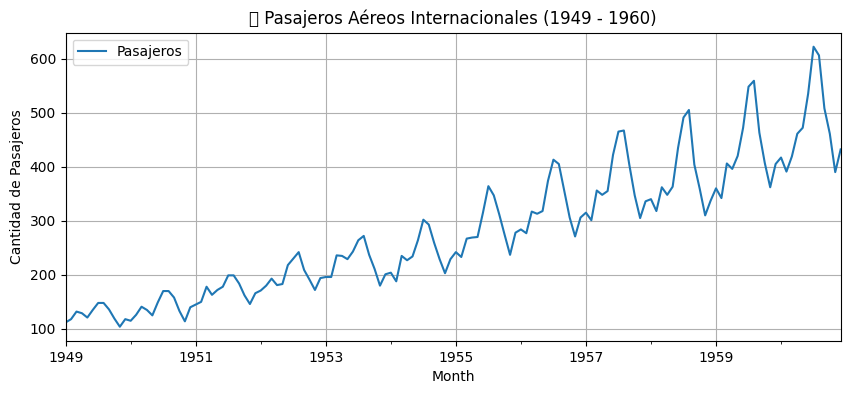

In [8]:
# ----------------------------------------------------
# CARGA Y VISUALIZACIÓN DE DATOS
# ----------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Cargar los datos
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.columns = ['Pasajeros']

# Visualización inicial
df.plot(title="🔹 Pasajeros Aéreos Internacionales (1949 - 1960)", figsize=(10,4))
plt.ylabel("Cantidad de Pasajeros")
plt.grid()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


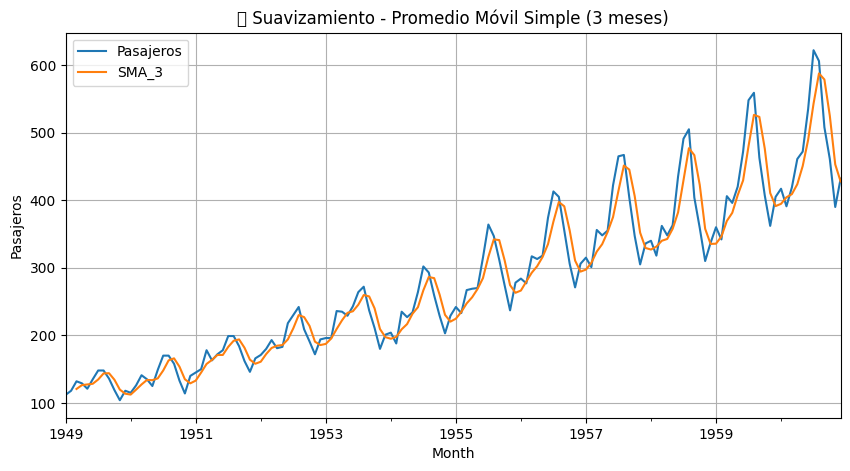

In [9]:
# ----------------------------------------------------
# 🔸 Suavizamiento 1: Promedio Móvil Simple
# ----------------------------------------------------
df['SMA_3'] = df['Pasajeros'].rolling(window=3).mean()

df[['Pasajeros', 'SMA_3']].plot(figsize=(10, 5), title='🔸 Suavizamiento - Promedio Móvil Simple (3 meses)')
plt.ylabel("Pasajeros")
plt.grid()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


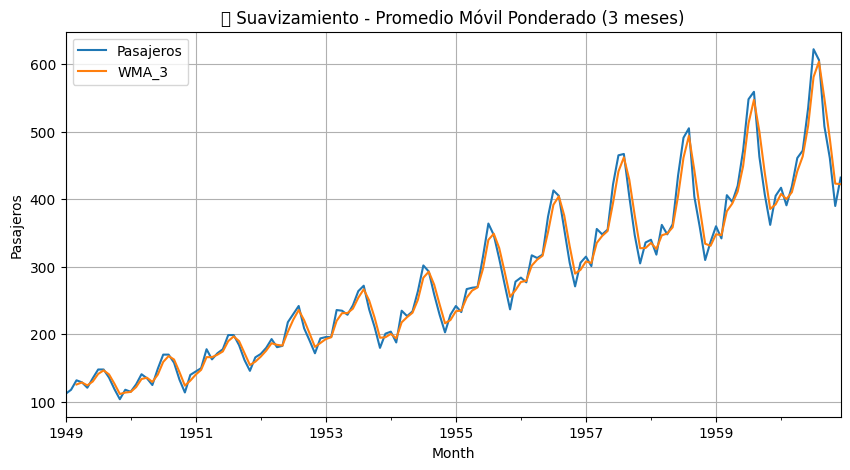

In [10]:
# ----------------------------------------------------
# 🔸 Suavizamiento 2: Promedio Móvil Ponderado
# ----------------------------------------------------
weights = np.array([0.1, 0.3, 0.6])

def weighted_moving_average(series, weights):
    return series.rolling(window=len(weights)).apply(lambda x: np.dot(x, weights), raw=True)

df['WMA_3'] = weighted_moving_average(df['Pasajeros'], weights)

df[['Pasajeros', 'WMA_3']].plot(figsize=(10, 5), title='🔸 Suavizamiento - Promedio Móvil Ponderado (3 meses)')
plt.ylabel("Pasajeros")
plt.grid()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


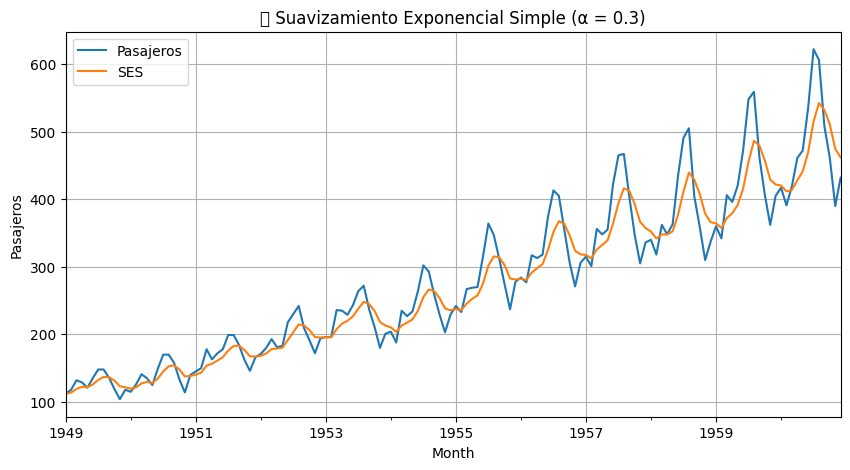

In [11]:
# ----------------------------------------------------
# 🔸 Suavizamiento 3: Exponencial Simple
# ----------------------------------------------------
alpha = 0.3
df['SES'] = df['Pasajeros'].ewm(alpha=alpha, adjust=False).mean()

df[['Pasajeros', 'SES']].plot(figsize=(10, 5), title='🔸 Suavizamiento Exponencial Simple (α = 0.3)')
plt.ylabel("Pasajeros")
plt.grid()
plt.show()

<ipython-input-12-3d6ac831ddf8>:8: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


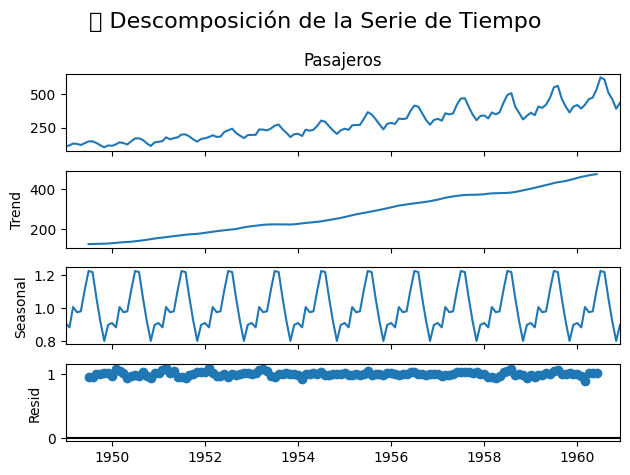

In [12]:
# ----------------------------------------------------
# 🔸 Suavizamiento 4: Descomposición
# ----------------------------------------------------
resultado = seasonal_decompose(df['Pasajeros'], model='multiplicative', period=12)

resultado.plot()
plt.suptitle('🔸 Descomposición de la Serie de Tiempo', fontsize=16)
plt.tight_layout()
plt.show()

In [13]:
# ----------------------------------------------------
# 🔹 Conclusiones por integrante
# ----------------------------------------------------
print("🔹 Conclusiones por integrante")

print("""
👤 Arteaga González Edwin Yahir:
Durante este proyecto comprendí cómo los métodos de suavizamiento ayudan a identificar patrones en una serie de tiempo.
Aplicar el promedio móvil simple y exponencial me permitió ver cómo cada técnica resalta distintas características.
Este análisis me enseñó la importancia de limpiar y transformar datos antes de interpretarlos.

👤 Juarez Gaona Erick Rafael:
Me pareció interesante cómo cada método responde diferente a los cambios en los datos.
El promedio móvil ponderado, por ejemplo, se ajusta más rápido a los cambios que el simple.
Gracias al análisis pude identificar claramente la tendencia general y la estacionalidad.

👤 Rico Gaytan Diana Andrea:
Este análisis me ayudó a visualizar cómo varía una serie en el tiempo.
La descomposición fue la técnica que más me gustó porque separa los componentes y facilita la interpretación.
Aprendí a aplicar estas técnicas en Python y entendí mejor cómo funcionan internamente.

👤 Ruiz Merino Wendy Ivonne:
Aprendí a trabajar con datos temporales, desde su carga y transformación hasta su análisis.
Las gráficas de suavizamiento y la descomposición me dieron una perspectiva más clara sobre cómo analizar datos con variaciones estacionales.
Considero que estas herramientas son muy útiles para cualquier campo profesional.
""")

🔹 Conclusiones por integrante

👤 Arteaga González Edwin Yahir:
Durante este proyecto comprendí cómo los métodos de suavizamiento ayudan a identificar patrones en una serie de tiempo. 
Aplicar el promedio móvil simple y exponencial me permitió ver cómo cada técnica resalta distintas características. 
Este análisis me enseñó la importancia de limpiar y transformar datos antes de interpretarlos.

👤 Juarez Gaona Erick Rafael:
Me pareció interesante cómo cada método responde diferente a los cambios en los datos. 
El promedio móvil ponderado, por ejemplo, se ajusta más rápido a los cambios que el simple. 
Gracias al análisis pude identificar claramente la tendencia general y la estacionalidad.

👤 Rico Gaytan Diana Andrea:
Este análisis me ayudó a visualizar cómo varía una serie en el tiempo. 
La descomposición fue la técnica que más me gustó porque separa los componentes y facilita la interpretación. 
Aprendí a aplicar estas técnicas en Python y entendí mejor cómo funcionan internamente.

👤 